In [108]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
df = pd.read_csv('./winequality-white.csv') #sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [169]:
# add some ramdom noise to the data to make it more realistic fixed acidity
# id_number = 0.34
# df['fixed acidity'] = df['fixed acidity'] + id_number 
# df['volatile acidity'] = df['volatile acidity'] + id_number
# df['citric acid'] = df['citric acid'] + id_number
# df['residual sugar'] = df['residual sugar'] + id_number
# df['chlorides'] = df['chlorides'] + id_number
# df['free sulfur dioxide'] = df['free sulfur dioxide'] + id_number
# df['total sulfur dioxide'] = df['total sulfur dioxide'] + id_number
# df['density'] = df['density'] + id_number
# df['pH'] = df['pH'] + id_number
# df['sulphates'] = df['sulphates'] + id_number
# df['alcohol'] = df['alcohol'] + id_number

columns_to_modify = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
    'pH', 'sulphates', 'alcohol'
]

id_number = 0.34
df[columns_to_modify] = df[columns_to_modify].add(id_number)



In [170]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.34,0.61,0.70,21.04,0.385,45.34,170.34,1.3410,3.34,0.79,9.14,6
1,6.64,0.64,0.68,1.94,0.389,14.34,132.34,1.3340,3.64,0.83,9.84,6
2,8.44,0.62,0.74,7.24,0.390,30.34,97.34,1.3351,3.60,0.78,10.44,6
3,7.54,0.57,0.66,8.84,0.398,47.34,186.34,1.3356,3.53,0.74,10.24,6
4,7.54,0.57,0.66,8.84,0.398,47.34,186.34,1.3356,3.53,0.74,10.24,6


> First check is there any null values in the dataset

## List of data series

In [171]:
# Define the base data
base_data = [
    [7.06, 0.88, 0.02, 1.9, 25.01, 67.5, 0.991, 3.22, 0.68, 9.88, 5],
    [9.06, 0.88, 0.02, 1.9, 25.01, 67.5, 0.991, 3.22, 0.68, 9.88, 7]
]
placeholder_value = None 

datarowSeries = [pd.Series(data + [placeholder_value], index=df.columns) for data in base_data]


df = pd.concat([df, pd.DataFrame(datarowSeries)], ignore_index=True)

In [172]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 2
dtype: int64

In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4900.0,7.195141,0.844119,4.14000,6.640000,7.140000,7.6400,14.54
volatile acidity,4900.0,0.618348,0.100913,0.42000,0.550000,0.600000,0.6600,1.44
citric acid,4900.0,0.673924,0.121715,0.02000,0.610000,0.660000,0.7300,2.00
residual sugar,4900.0,6.729443,5.071961,0.94000,2.040000,5.540000,10.2400,66.14
chlorides,4900.0,0.395823,0.497913,0.34900,0.376000,0.383000,0.3900,25.01
free sulfur dioxide,4900.0,35.661086,17.015835,2.34000,23.340000,34.340000,46.3400,289.34
total sulfur dioxide,4900.0,138.644449,42.580359,0.99100,108.340000,134.340000,167.3400,440.34
density,4900.0,1.334797,0.038216,1.32711,1.331727,1.333745,1.3361,3.22
pH,4900.0,3.527104,0.161563,0.68000,3.430000,3.520000,3.6200,4.16
sulphates,4900.0,0.833541,0.215507,0.56000,0.750000,0.810000,0.8900,9.88


# EDA

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

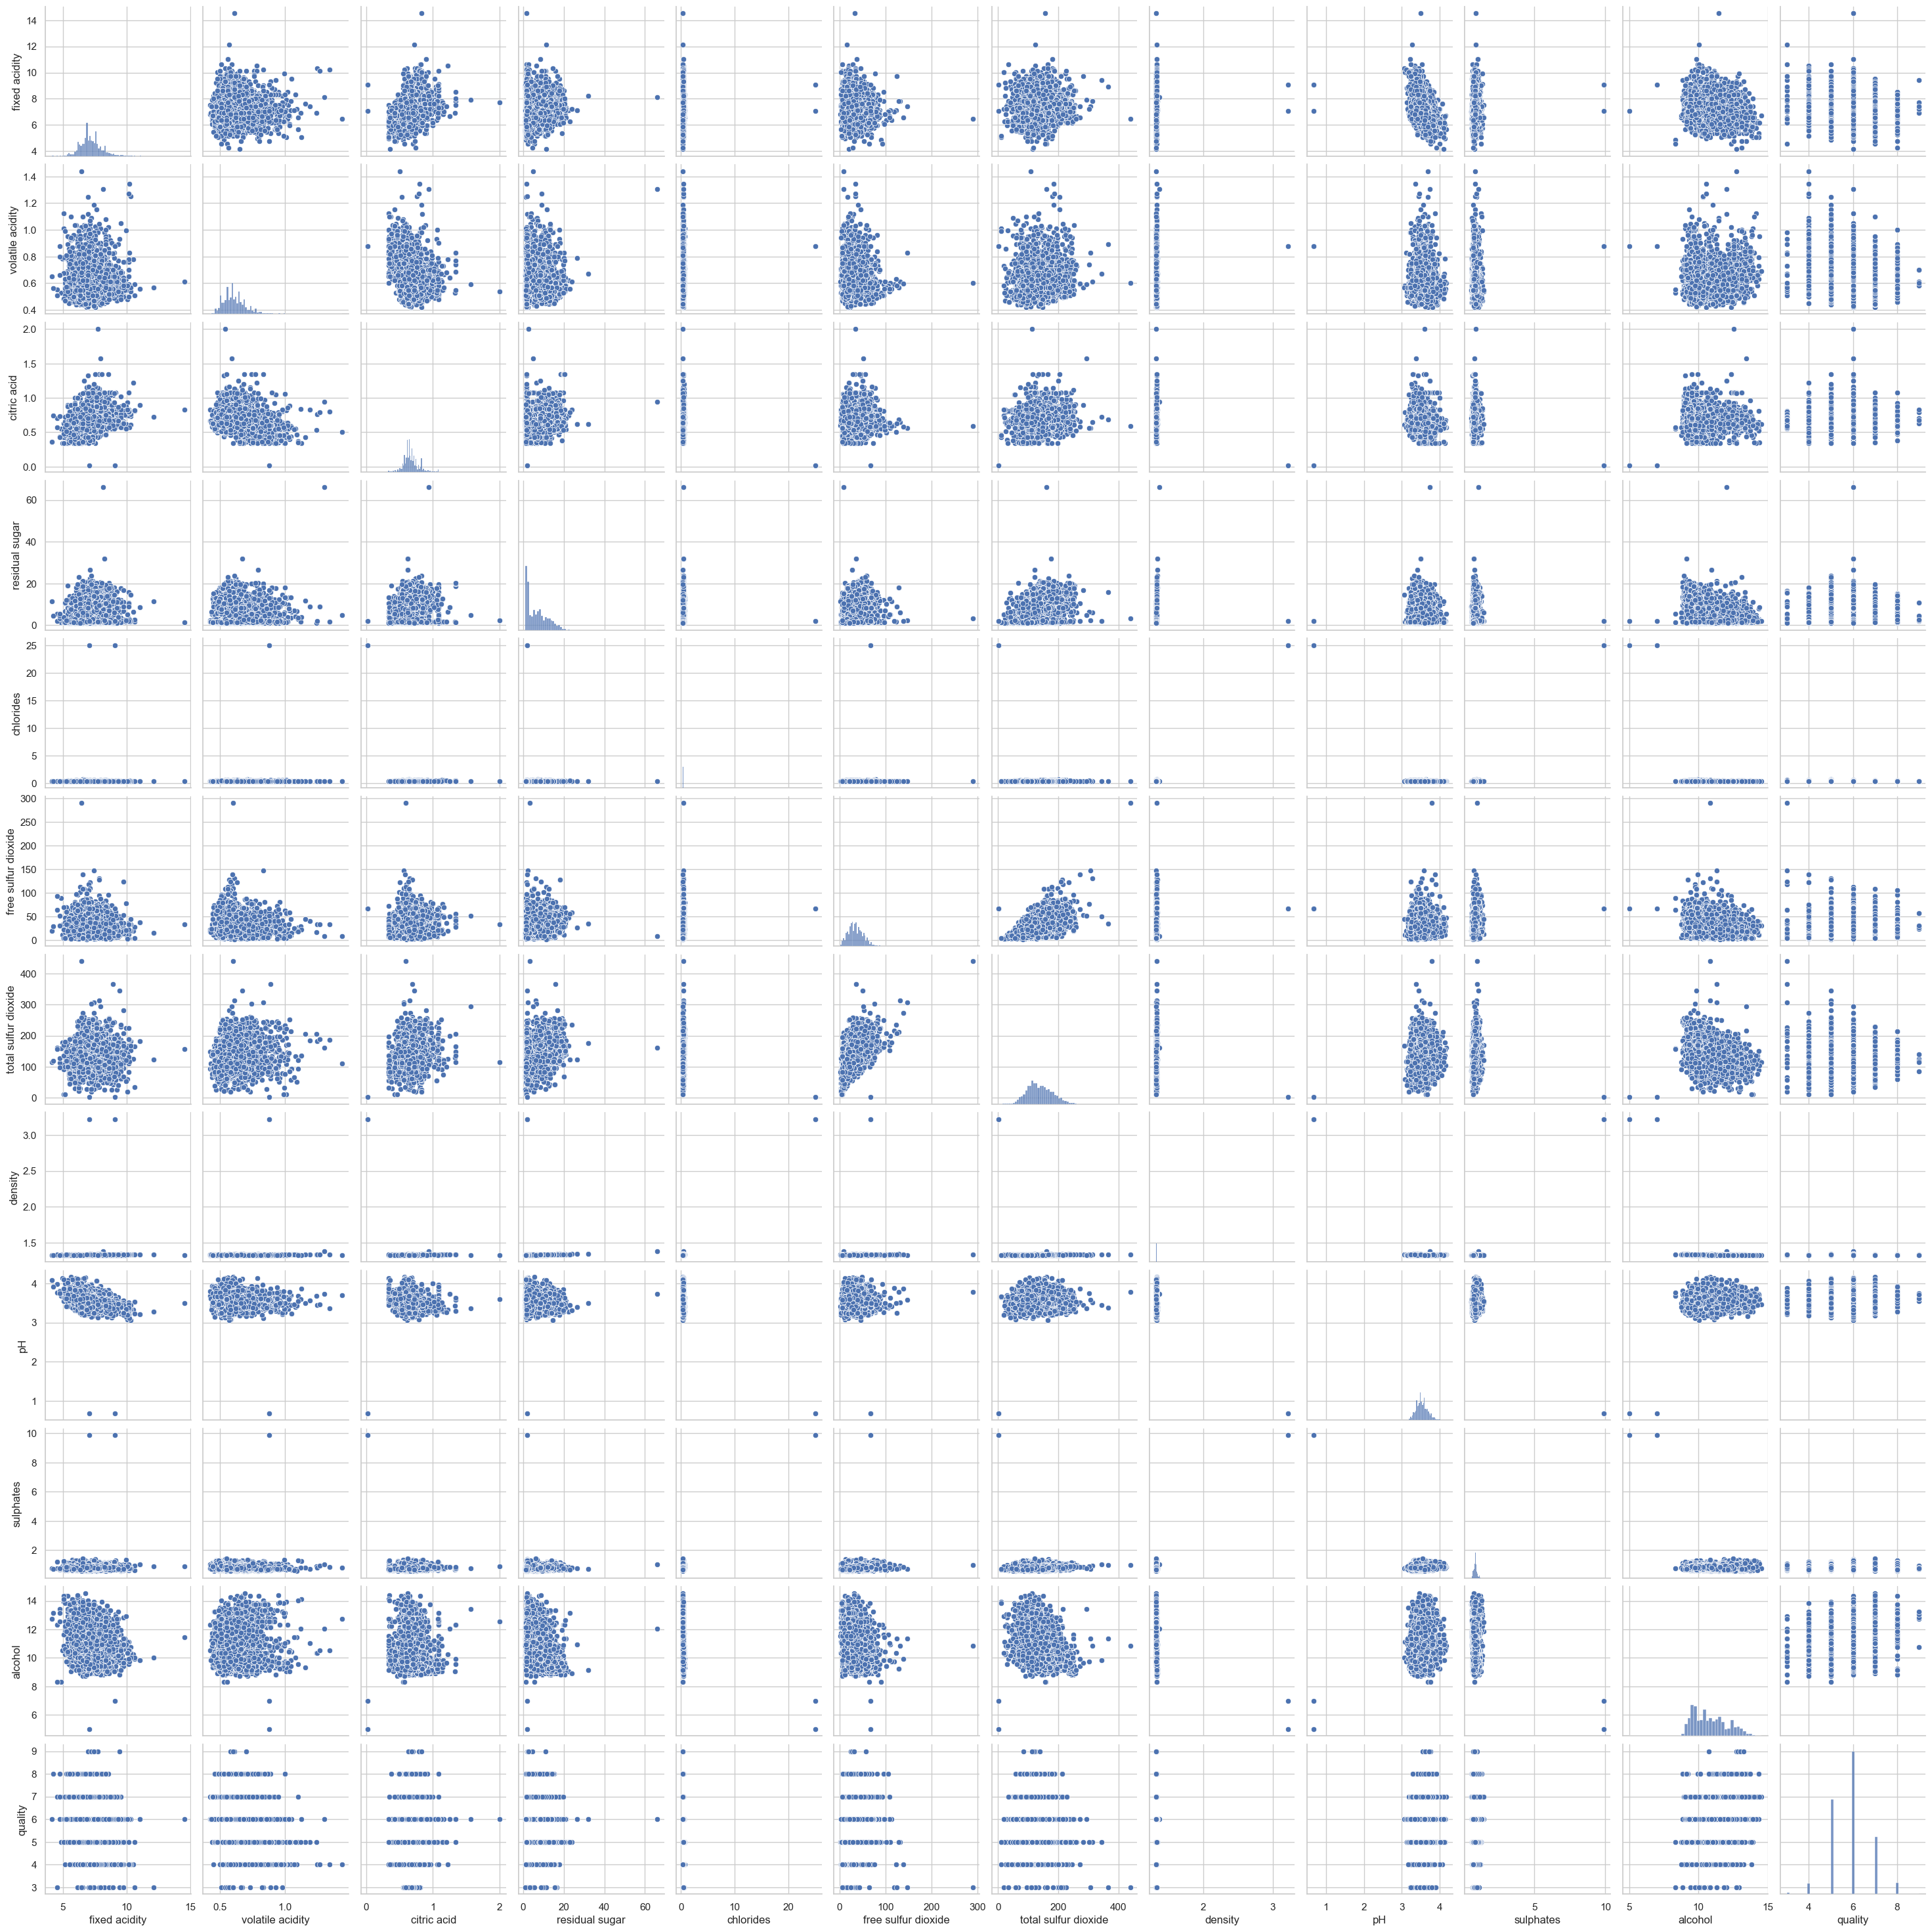

In [174]:
sns.pairplot(df)

In [175]:
df['quality'].value_counts()

quality
6.0    2198
5.0    1457
7.0     880
8.0     175
4.0     163
3.0      20
9.0       5
Name: count, dtype: int64

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='quality'>

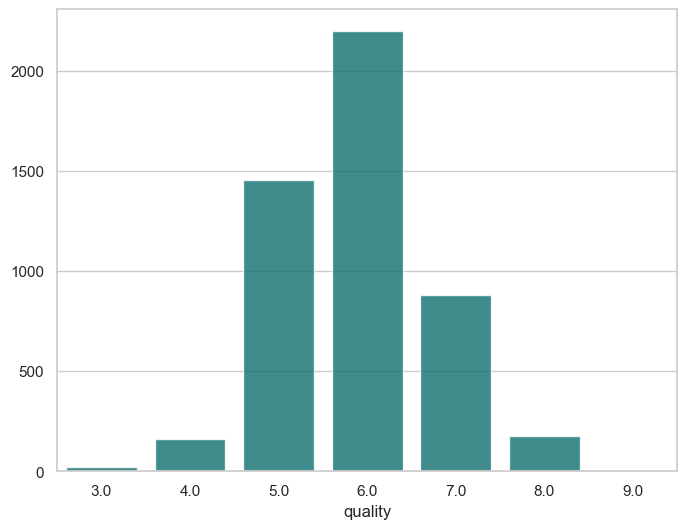

In [176]:
quality_ = df['quality'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=quality_.index, y=quality_.values, alpha=0.8, color='teal')

# Heatmap

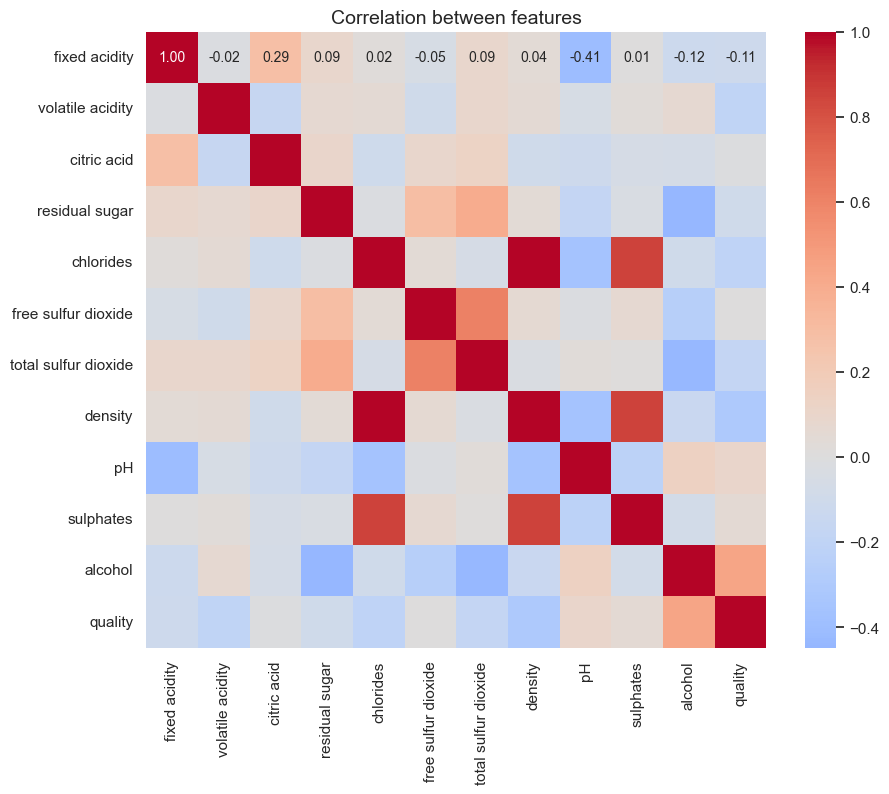

In [177]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0 , annot_kws={'fontsize':10})
plt.title('Correlation between features', fontsize=14)
plt.show()

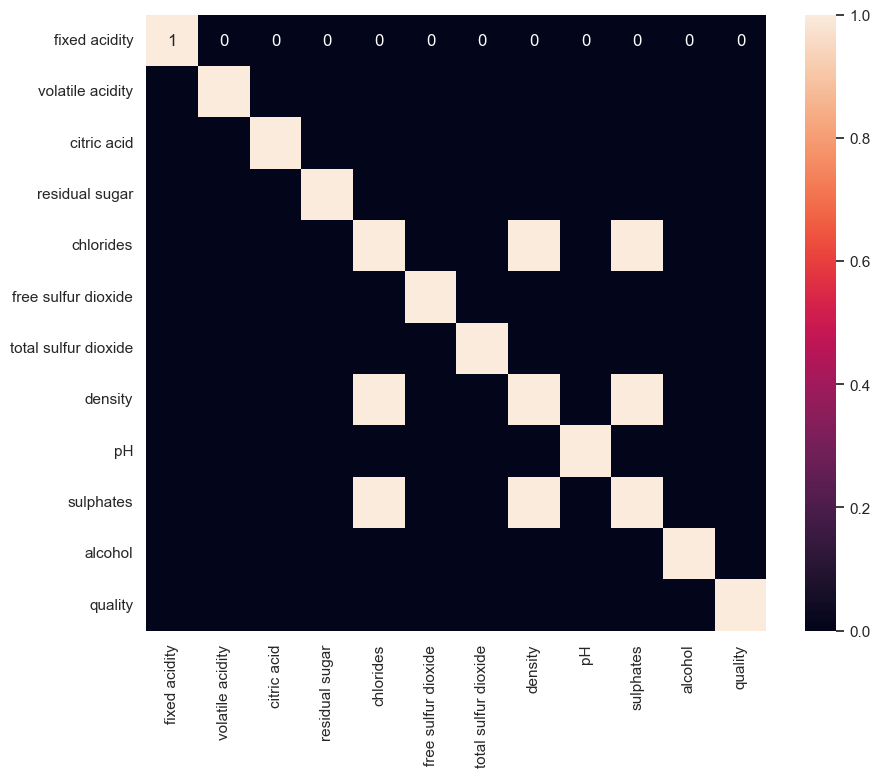

In [178]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() > 0.7, annot=True)
plt.show()

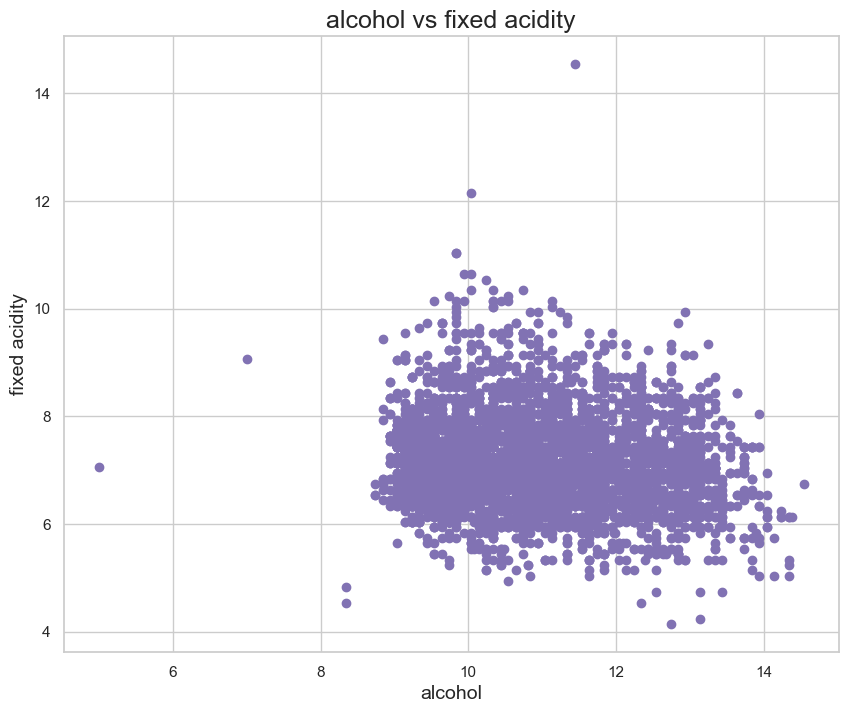

In [179]:
plt.figure(figsize=(10, 8))
plt.scatter(x="alcohol", y="fixed acidity", data=df, marker='o', c='m')
plt.xlabel("alcohol", fontsize=14)
plt.ylabel("fixed acidity", fontsize=14)
plt.title("alcohol vs fixed acidity", fontsize=18)
plt.show()

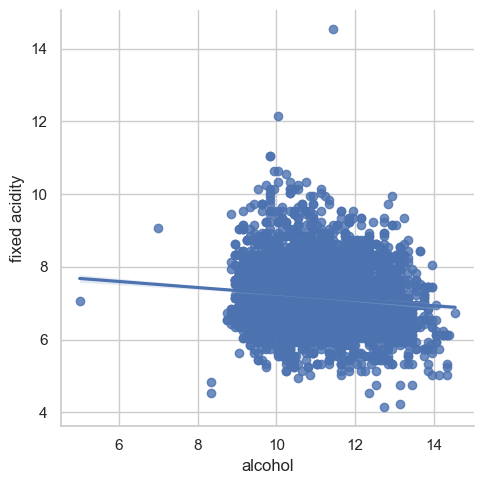

In [180]:
sns.lmplot(x='alcohol', y='fixed acidity', data=df)
plt.show()

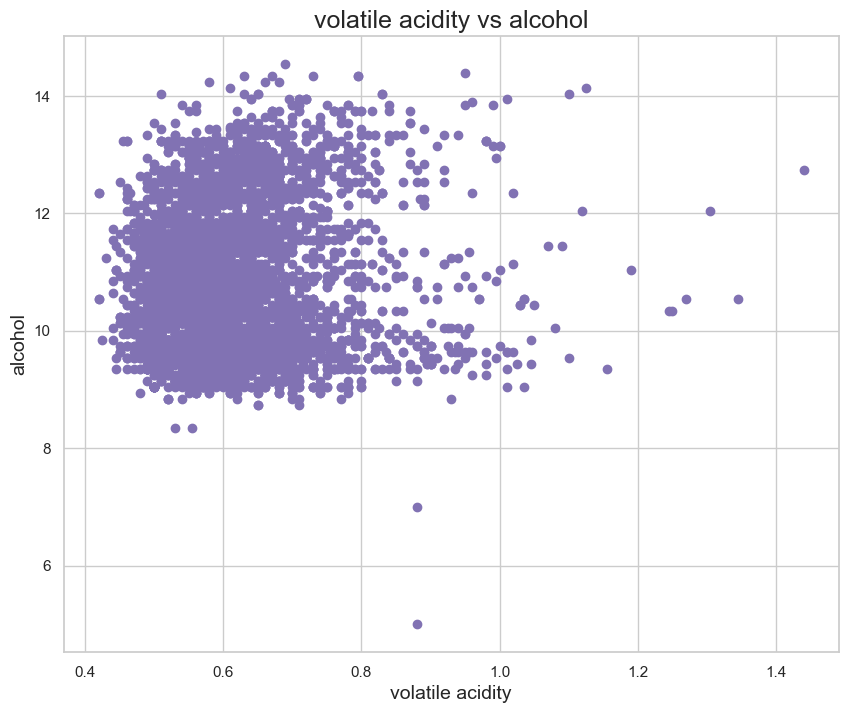

In [181]:
plt.figure(figsize=(10, 8))
plt.scatter(x='volatile acidity', y='alcohol', data=df, marker='o', c='m')
plt.xlabel('volatile acidity', fontsize=14)
plt.ylabel('alcohol', fontsize=14)
plt.title('volatile acidity vs alcohol', fontsize=18)
plt.show()

In [182]:
df.corrwith(df['quality']).abs().sort_values(ascending=False)[1:]

alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
dtype: float64

<Axes: title={'center': 'Correlation with quality'}>

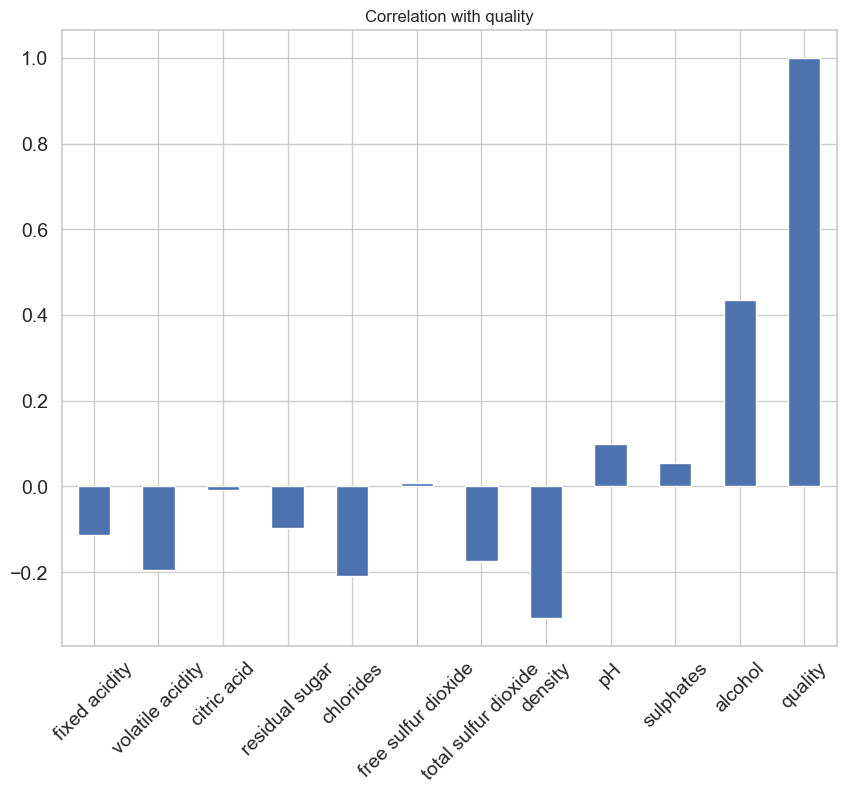

In [183]:
# relationship between wine and other characteristics
df.corrwith(df['quality']).plot.bar(figsize=(10,8), title='Correlation with quality', rot=45, grid=True, fontsize=14)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

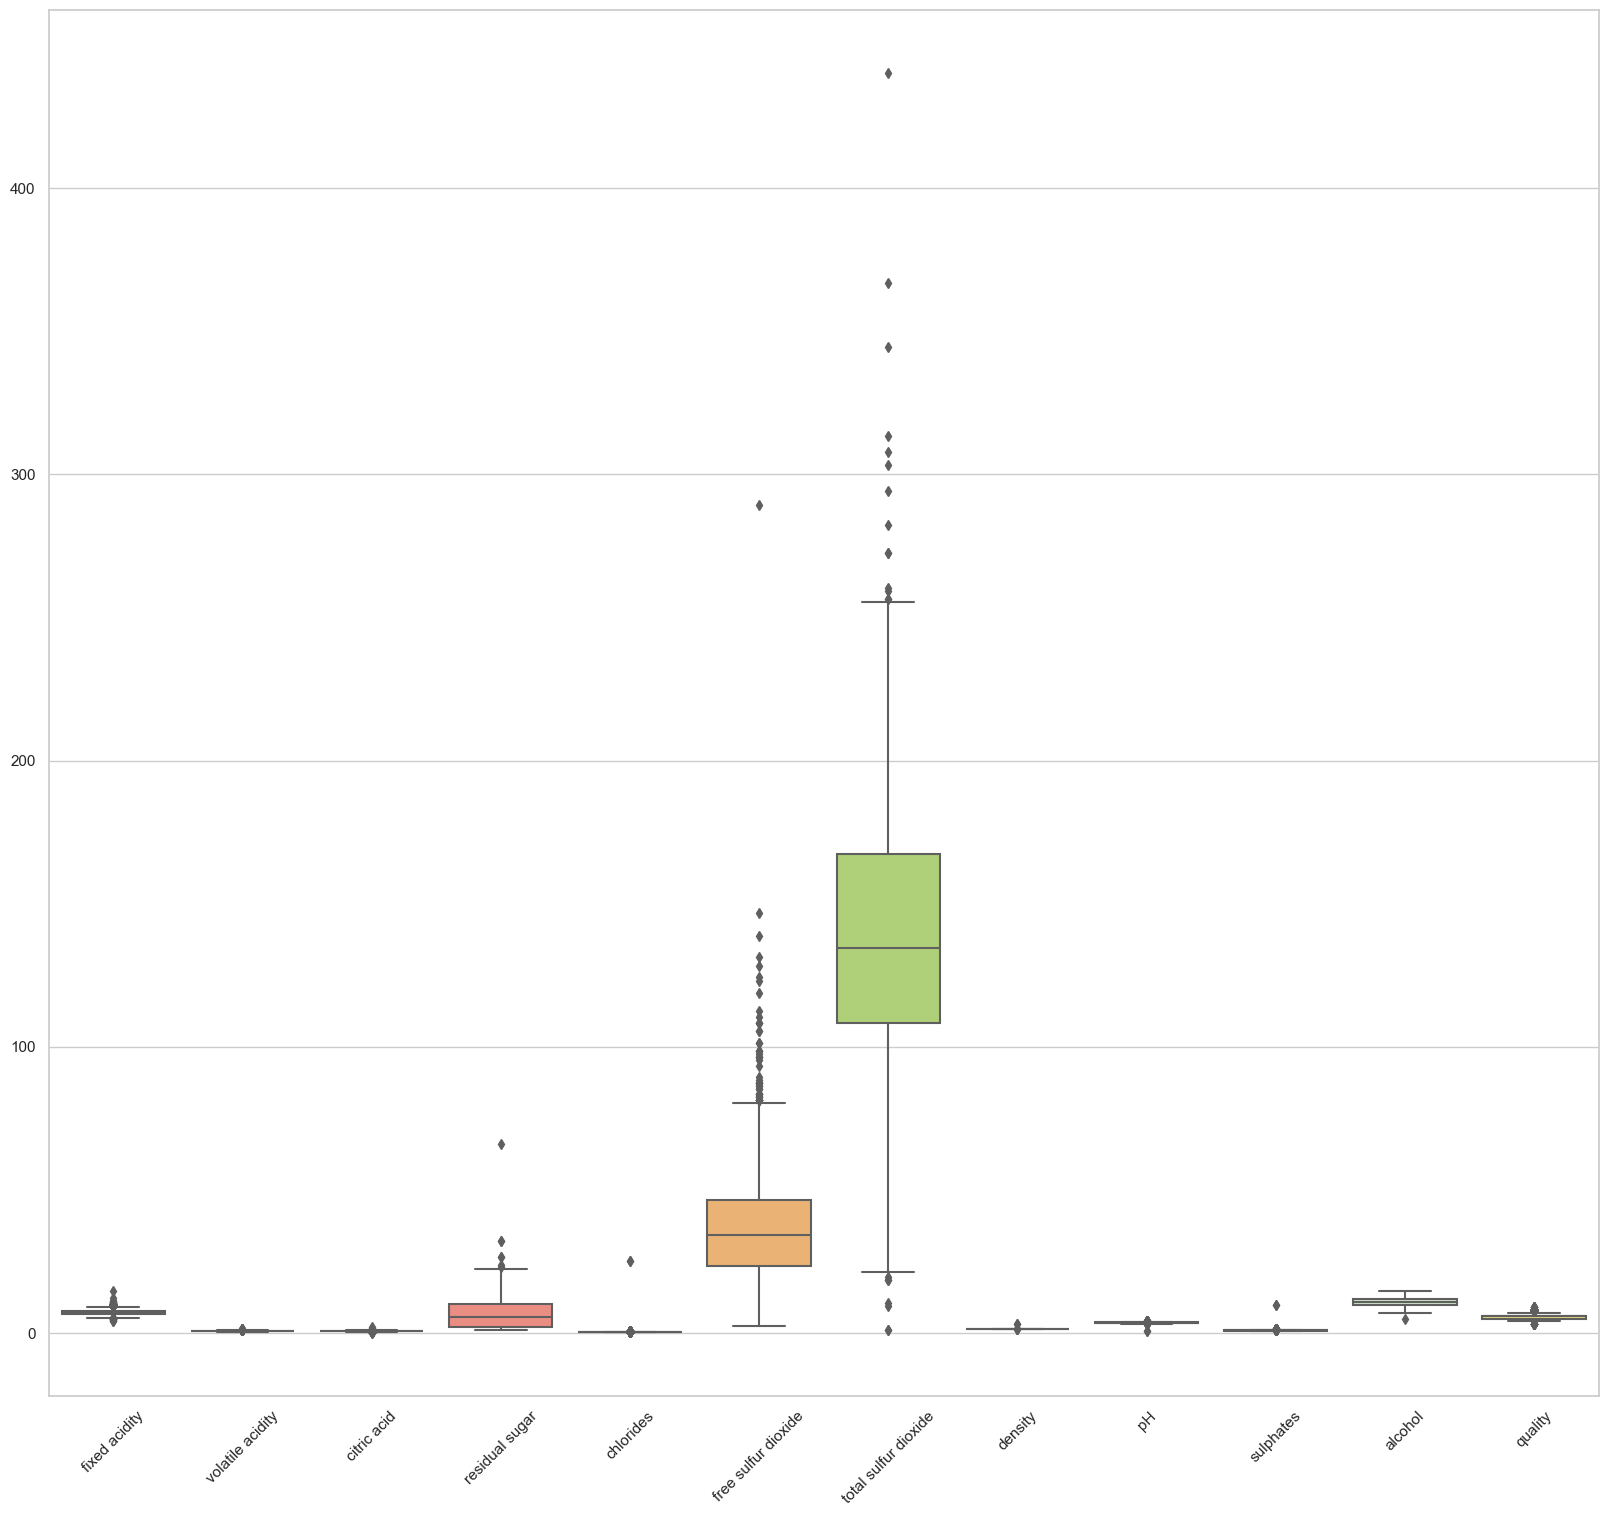

In [184]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 18))
sns.boxplot(data=df, palette='Set3')
plt.xticks(rotation=45)
plt.show()

In [185]:
# Remove outliers. so that we can get a better result

lower_limit = df['free sulfur dioxide'].mean() - 3 * df['free sulfur dioxide'].std()
upper_limit = df['free sulfur dioxide'].mean() + 3 * df['free sulfur dioxide'].std()

print(lower_limit, upper_limit)


-15.386420358223873 86.70859178679531


In [186]:
df_sulfur_without_outliers = df[(df['free sulfur dioxide'] > lower_limit) & (df['free sulfur dioxide'] < upper_limit)]


df_sulfur_without_outliers.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.34,0.61,0.70,21.04,0.385,45.34,170.34,1.3410,3.34,0.79,9.14,6.0
1,6.64,0.64,0.68,1.94,0.389,14.34,132.34,1.3340,3.64,0.83,9.84,6.0
2,8.44,0.62,0.74,7.24,0.390,30.34,97.34,1.3351,3.60,0.78,10.44,6.0
3,7.54,0.57,0.66,8.84,0.398,47.34,186.34,1.3356,3.53,0.74,10.24,6.0
4,7.54,0.57,0.66,8.84,0.398,47.34,186.34,1.3356,3.53,0.74,10.24,6.0


In [187]:
print(df.shape[0], df_sulfur_without_outliers.shape[0])

# difference between the two dataframes
print(df.shape[0] - df_sulfur_without_outliers.shape[0])

4900 4868
32


In [188]:
# remove outliers from total sulfur dioxide
total_sulfur_lower_limit = df['total sulfur dioxide'].mean() - 3 * df['total sulfur dioxide'].std()
total_sulfur_upper_limit = df['total sulfur dioxide'].mean() + 3 * df['total sulfur dioxide'].std()

print(total_sulfur_lower_limit, total_sulfur_upper_limit)

10.903372468424578 266.38552630708557


In [189]:
total_sulfur_df_without_outliers = df_sulfur_without_outliers[(df_sulfur_without_outliers['total sulfur dioxide']> total_sulfur_lower_limit) & (df_sulfur_without_outliers['total sulfur dioxide'] < total_sulfur_upper_limit)]

total_sulfur_df_without_outliers.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.34,0.61,0.70,21.04,0.385,45.34,170.34,1.3410,3.34,0.79,9.14,6.0
1,6.64,0.64,0.68,1.94,0.389,14.34,132.34,1.3340,3.64,0.83,9.84,6.0
2,8.44,0.62,0.74,7.24,0.390,30.34,97.34,1.3351,3.60,0.78,10.44,6.0
3,7.54,0.57,0.66,8.84,0.398,47.34,186.34,1.3356,3.53,0.74,10.24,6.0
4,7.54,0.57,0.66,8.84,0.398,47.34,186.34,1.3356,3.53,0.74,10.24,6.0


In [190]:
df_sulfur_without_outliers.shape[0] - total_sulfur_df_without_outliers.shape[0]

10

In [191]:
# remove outliers from residual sugar
residual_sugar_lower_limit = df['residual sugar'].mean() - 3 * df['residual sugar'].std()
residual_sugar_upper_limit = df['residual sugar'].mean() + 3 * df['residual sugar'].std()

print(residual_sugar_lower_limit, residual_sugar_upper_limit)

-8.486441608495259 21.945327322780972


In [192]:
residual_sugar_df_without_outliers = total_sulfur_df_without_outliers[(total_sulfur_df_without_outliers['residual sugar'] > residual_sugar_lower_limit) & (total_sulfur_df_without_outliers['residual sugar'] < residual_sugar_upper_limit)]

residual_sugar_df_without_outliers.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.34,0.61,0.70,21.04,0.385,45.34,170.34,1.3410,3.34,0.79,9.14,6.0
1,6.64,0.64,0.68,1.94,0.389,14.34,132.34,1.3340,3.64,0.83,9.84,6.0
2,8.44,0.62,0.74,7.24,0.390,30.34,97.34,1.3351,3.60,0.78,10.44,6.0
3,7.54,0.57,0.66,8.84,0.398,47.34,186.34,1.3356,3.53,0.74,10.24,6.0
4,7.54,0.57,0.66,8.84,0.398,47.34,186.34,1.3356,3.53,0.74,10.24,6.0


In [193]:
total_sulfur_df_without_outliers.shape[0] - residual_sugar_df_without_outliers.shape[0]

9

In [194]:
residual_sugar_df_without_outliers.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [195]:
# this is work main df without outliers 
df = residual_sugar_df_without_outliers

In [199]:
df.quality.value_counts()

quality
6    2181
5    1439
7     878
8     171
4     160
3      15
9       5
Name: count, dtype: int64

In [207]:
#  0 - 5 = bad wine 
# 6 - 10 = good 

# first convert quality to int
df['quality'] = df['quality'].astype(int)

# list of quality in string
quality_list = { 3: 'bad', 4: 'bad', 5: 'bad', 6: 'good', 7: 'good', 8: 'good', 9: 'good', 10: 'good'}

# map quality to string
df['quality'] = df['quality'].map(quality_list)

print(df['quality'].value_counts())


quality
good    3235
bad     1614
Name: count, dtype: int64


/var/folders/mw/8vnpmg411llc041jzll3vd0h0000gn/T/ipykernel_28954/2585452033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'] = df['quality'].astype(int)
/var/folders/mw/8vnpmg411llc041jzll3vd0h0000gn/T/ipykernel_28954/2585452033.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'] = df['quality'].map(quality_list)


In [209]:
# df['quality'].value_counts()
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.34,0.61,0.70,21.04,0.385,45.34,170.34,1.3410,3.34,0.79,9.14,good
1,6.64,0.64,0.68,1.94,0.389,14.34,132.34,1.3340,3.64,0.83,9.84,good
2,8.44,0.62,0.74,7.24,0.390,30.34,97.34,1.3351,3.60,0.78,10.44,good
3,7.54,0.57,0.66,8.84,0.398,47.34,186.34,1.3356,3.53,0.74,10.24,good
4,7.54,0.57,0.66,8.84,0.398,47.34,186.34,1.3356,3.53,0.74,10.24,good


Most of the characteristics do not have a large correlation with the grade, but the alcohol content was the highest at 0.43. The next hight characteristics is density. Volatile acidity shows a strong negative correlation with grade.

## Quality Test


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.ty

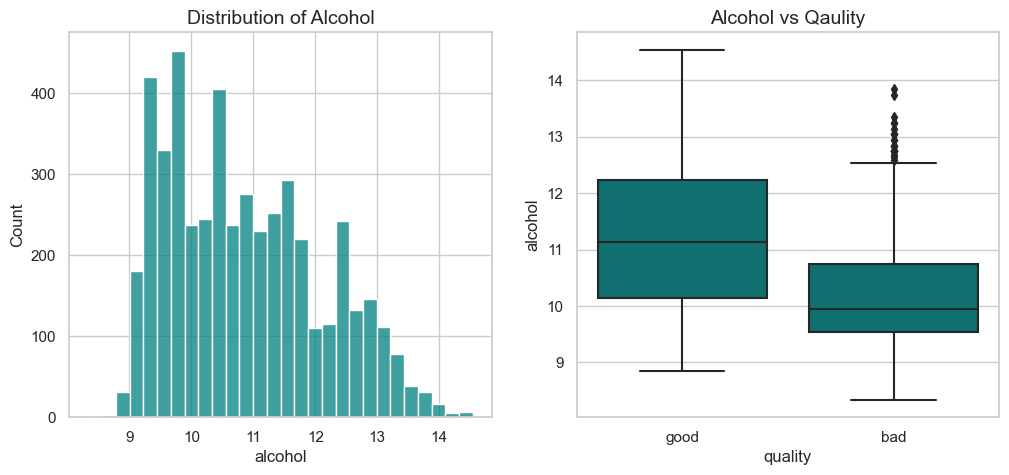

In [210]:
# alcohol level for distribution of class of alcohol data
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data=df, x='alcohol', ax=ax[0], color='teal')
sns.boxplot(data=df, x='quality', y='alcohol', ax=ax[1], color='teal')
ax[0].set_title('Distribution of Alcohol', fontsize=14)
ax[1].set_title('Alcohol vs Qaulity', fontsize=14)
plt.show()


In [211]:
# percentage of concentrated alcohol in wine
# df.groupby('alcohol')['quality'].mean().plot.bar(figsize=(10,8), color='teal')
df.groupby('alcohol')['quality'].value_counts().sort_values(ascending=False)[0:5]
# shows that 9.5% alcohol is the most common in the dataset and 9.4% is the second most common

alcohol  quality
9.74     bad        140
11.34    good       137
9.84     bad        124
9.54     bad        113
10.84    good       112
Name: count, dtype: int64

## Logistic regression

In [213]:
targetVariable = 'quality'
predictors = ['alcohol', 'density']
X = df[predictors].values
y = df[targetVariable].values

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [215]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [217]:
y_pred = lr.predict(X_test)
y_pred

array(['good', 'good', 'bad', ..., 'bad', 'good', 'good'], dtype=object)

In [218]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[166, 244],
       [147, 656]])

In [219]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6776586974443528


## Decision Tree

In [220]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1134)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1134)

Accuracy:  0.7106347897774113


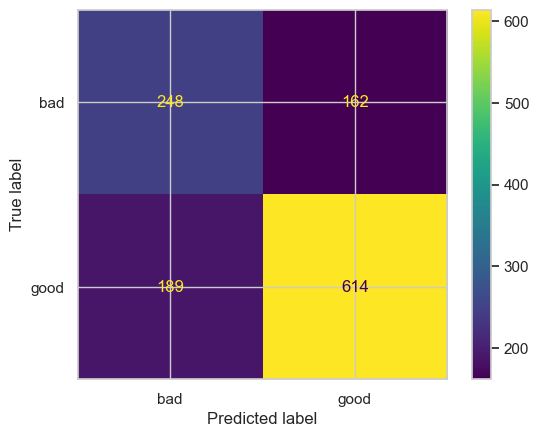

In [224]:
#  predict the test data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))



##  Random Forest

In [225]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1134)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1134)

In [226]:
y_pred = rf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.7320692497938994


## Support Vector

In [228]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(random_state=1134)
svc.fit(X_train, y_train)

SVC(random_state=1134)

In [230]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.6768342951360263


# you can Overfitting test 